<a href="https://colab.research.google.com/github/vamado09/Applied-Data-Science/blob/main/Week5_VicenteDeLeon2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vicente De Leon

IU_id: 2001014594

APPLIED DATA SCIENCE: 9998

In [ ]:
!pip install factor_analyzer

In [2]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer # from R package psych
from sklearn.decomposition import FactorAnalysis, PCA
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = datasets.load_iris()

iris_X = StandardScaler().fit_transform(iris['data'])
pd.DataFrame(iris_X).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [4]:
feature_names = iris['feature_names']

# Covariance Matrix

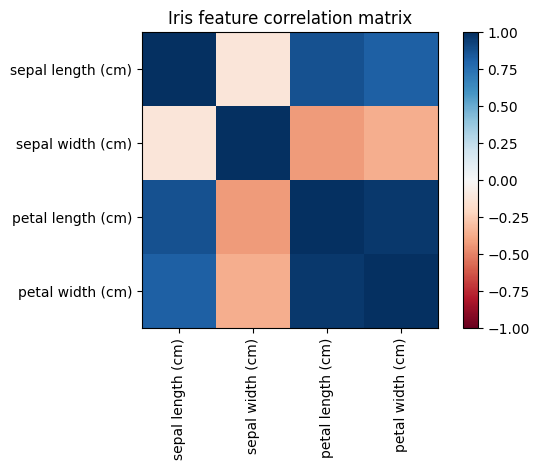

In [5]:
plt.figure()
ax = plt.axes()
im = ax.imshow(np.corrcoef(iris_X.T), cmap='RdBu', vmin=-1, vmax=1)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(feature_names))
plt.colorbar(im)
ax.set_title('Iris feature correlation matrix')
plt.tight_layout()
plt.show()

I like working with heat maps, I had this project at work in which I collected NPS data from customer services to determine which store and distribution centar had the most negative sentiment. Really cool visualization!

# Adequacy Test

**Barlett Spercity**: Bartlett Test of Sphericity is used to check that the correlation matrix of the variables in your dataset diverges significantly from the identity matrix.

Good source: https://factor-analyzer.readthedocs.io/en/latest/

In [6]:
chi_square_value,p_value = calculate_bartlett_sphericity(iris_X)
chi_square_value, p_value

(706.9592430234726, 1.9226796044171964e-149)

The p-value is extremely low, which means that we can reject the null hypothesis (indicating that the variables are correlated). This makes it suitable for factor analysis.

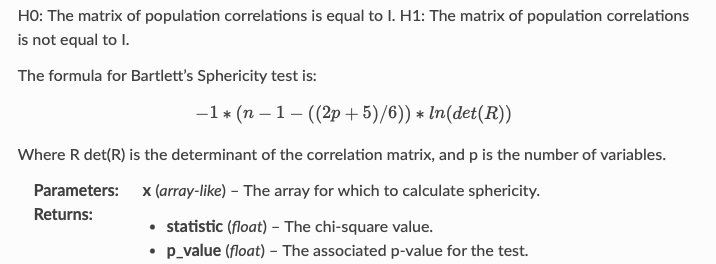

In [7]:
kmo_all,kmo_model = calculate_kmo(iris_X)
kmo_model

0.540076675009722

0.504 is the KMO value, which might suggest that the data is not highly suitable for factor analysis.

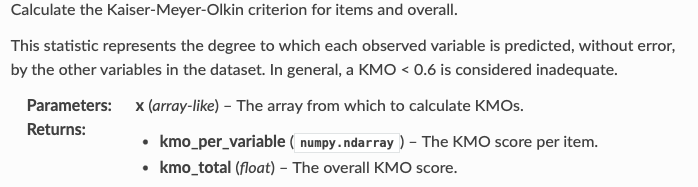

# Number of Factors

In [8]:
fa = FactorAnalyzer()
fa.fit(iris_X)

# Checking Eigenvalues
ev, v = fa.get_eigenvalues()

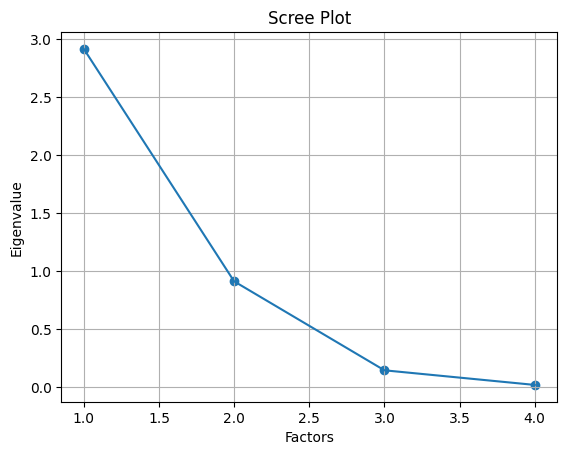

In [9]:
plt.scatter(range(1,iris_X.shape[1]+1),ev)
plt.plot(range(1,iris_X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The plot shows that the first two factors eigenvalues greater than 1 (around 3 and 1.5). This suggests that two factors are the most significant for capturing the variance in the dataset.

# Perform Factor Analysis

Varimax -> is a technique to make the output of factor analysis easier to interpret by making the loadings more distinct.

In [10]:
fa = FactorAnalyzer(rotation = 'varimax', n_factors=2)
fa.fit(iris_X, 2, )

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [11]:
fa.get_eigenvalues()

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([ 2.84243329,  0.88505993,  0.00853874, -0.01435222]))

In [12]:
print(pd.DataFrame(fa.loadings_,index=feature_names))

                          0         1
sepal length (cm)  0.901205  0.017890
sepal width (cm)  -0.150413  0.986195
petal length (cm)  0.964153 -0.284619
petal width (cm)   0.921401 -0.233245


In [13]:
print(pd.DataFrame(fa.get_factor_variance(), index=['sum','proportional','cumulative']))

                     0         1
sum           2.613367  1.108312
proportional  0.653342  0.277078
cumulative    0.653342  0.930420


Sources:

- Skilearn - Factor Analysis: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

- Numpy - Correlation:v=https://www.scaler.com/topics/numpy-correlation/
- Barlett sphercity: https://help.displayr.com/hc/en-us/articles/4402124219151-How-to-Do-a-Bartlett-s-Test-of-Sphericity
- Factor Analyzer: https://pypi.org/project/factor-analyzer/
- Factor Analyzer: https://factor-analyzer.readthedocs.io/en/latest/
- Factor Analyzer: https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html
- rotation: https://scikit-learn.org/stable/auto_examples/decomposition/plot_varimax_fa.html
